# Qiskit: Variational Quantum Algorithm
* Last updated on 12/06/2023
* Ref: https://learning.quantum.ibm.com/course/variational-algorithm-design



In [6]:
import qiskit
print(qiskit.__version__)

0.45.0


## Reference state

### Classical reference state $|\rho\rangle=001\rangle$.

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.x(0)

qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────

### Quantum reference state $|\rho\rangle=001\rangle$.

In [4]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
     ┌───┐└───┘
q_2: ┤ X ├─────
     └───┘

/var/folders/vx/2rtqxt1j1xq1b3b7ltbg_ch00000gn/T/ipykernel_4882/2905944026.py:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  reference_circuit = reference_circuit.bind_parameters(theta_list)


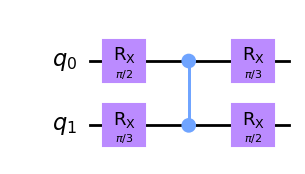

In [5]:
from qiskit.circuit.library import TwoLocal
from math import pi

reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 3, pi / 2]

reference_circuit = reference_circuit.bind_parameters(theta_list)

reference_circuit.decompose().draw("mpl")

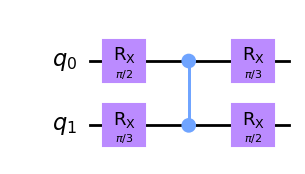

In [7]:
from qiskit.circuit.library import TwoLocal
from math import pi

reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 3, pi / 2]

reference_circuit = reference_circuit.assign_parameters(theta_list)

reference_circuit.decompose().draw("mpl")

## Parameterized Quantum Circuits (PQC)

In [9]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter("θ")

qc = QuantumCircuit(3)
qc.rx(theta, 0)
qc.cx(0, 1)
qc.x(2)

qc.draw()

┌───────┐     
q_0: ┤ Rx(θ) ├──■──
     └───────┘┌─┴─┐
q_1: ─────────┤ X ├
       ┌───┐  └───┘
q_2: ──┤ X ├───────
       └───┘

In [12]:
from math import pi

angle_list = [pi / 3, pi / 2]
circuits = [qc.assign_parameters({theta: angle}) for angle in angle_list]

for circuit in circuits:
    display(circuit.draw())

┌─────────┐     
q_0: ┤ Rx(π/3) ├──■──
     └─────────┘┌─┴─┐
q_1: ───────────┤ X ├
        ┌───┐   └───┘
q_2: ───┤ X ├────────
        └───┘

┌─────────┐     
q_0: ┤ Rx(π/2) ├──■──
     └─────────┘┌─┴─┐
q_1: ───────────┤ X ├
        ┌───┐   └───┘
q_2: ───┤ X ├────────
        └───┘

In [14]:
from qiskit.circuit.library import NLocal, CCXGate, CRZGate, RXGate
from qiskit.circuit import Parameter

theta = Parameter("θ")
ansatz = NLocal(
    num_qubits=5,
    rotation_blocks=[RXGate(theta), CRZGate(theta)],
    entanglement_blocks=CCXGate(),
    entanglement=[[0, 1, 2], [0, 2, 3], [4, 2, 1], [3, 1, 0]],
    reps=2,
    insert_barriers=True,
)
ansatz.decompose().draw()

┌──────────┐             ░                ┌───┐ ░  ┌──────────┐»
q_0: ┤ Rx(θ[0]) ├─────■───────░───■────■───────┤ X ├─░──┤ Rx(θ[7]) ├»
     ├──────────┤┌────┴─────┐ ░   │    │  ┌───┐└─┬─┘ ░  ├──────────┤»
q_1: ┤ Rx(θ[1]) ├┤ Rz(θ[5]) ├─░───■────┼──┤ X ├──■───░──┤ Rx(θ[8]) ├»
     ├──────────┤└──────────┘ ░ ┌─┴─┐  │  └─┬─┘  │   ░  ├──────────┤»
q_2: ┤ Rx(θ[2]) ├─────■───────░─┤ X ├──■────■────┼───░──┤ Rx(θ[9]) ├»
     ├──────────┤┌────┴─────┐ ░ └───┘┌─┴─┐  │    │   ░ ┌┴──────────┤»
q_3: ┤ Rx(θ[3]) ├┤ Rz(θ[6]) ├─░──────┤ X ├──┼────■───░─┤ Rx(θ[10]) ├»
     ├──────────┤└──────────┘ ░      └───┘  │        ░ ├───────────┤»
q_4: ┤ Rx(θ[4]) ├─────────────░─────────────■────────░─┤ Rx(θ[11]) ├»
     └──────────┘             ░                      ░ └───────────┘»
«                   ░                ┌───┐ ░ ┌───────────┐             
«q_0: ──────■───────░───■────■───────┤ X ├─░─┤ Rx(θ[14]) ├──────■──────
«     ┌─────┴─────┐ ░   │    │  ┌───┐└─┬─┘ ░ ├───────────┤┌─────┴─────┐
«q_1: ┤ Rz(θ[12]) ├─░───■────┼──┤ X ├──■───░─┤ Rx(θ[15]) ├┤ Rz(θ[19]) ├
«     └───────────┘ ░ ┌─┴─┐  │  └─┬─┘  │   ░ ├───────────┤└───────────┘
«q_2: ──────■───────░─┤ X ├──■────■────┼───░─┤ Rx(θ[16]) ├──────■──────
«     ┌─────┴─────┐ ░ └───┘┌─┴─┐  │    │   ░ ├───────────┤┌─────┴─────┐
«q_3: ┤ Rz(θ[13]) ├─░──────┤ X ├──┼────■───░─┤ Rx(θ[17]) ├┤ Rz(θ[20]) ├
«     └───────────┘ ░      └───┘  │        ░ ├───────────┤└───────────┘
«q_4: ──────────────░─────────────■────────░─┤ Rx(θ[18]) ├─────────────
«                   ░                      ░ └───────────┘

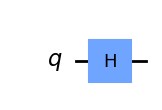

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp

# The following code will work for any other initial single-qubit state and observable
original_circuit = QuantumCircuit(1)
original_circuit.h(0)

H = SparsePauliOp(["X", "Z"], [2, -1])

aux_circuits = []
for pauli in H.paulis:
    aux_circ = original_circuit.copy()
    aux_circ.barrier()
    if str(pauli) == "X":
        aux_circ.h(0)
    elif str(pauli) == "Y":
        aux_circ.sdg(0)
        aux_circ.h(0)
    else:
        aux_circ.id(0)
    aux_circ.measure_all()
    aux_circuits.append(aux_circ)

original_circuit.draw("mpl")

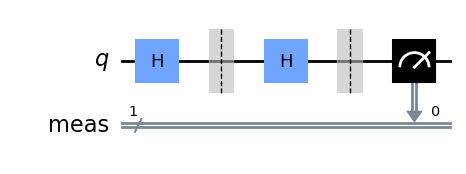

In [17]:
# Auxiliary circuit for X
aux_circuits[0].draw('mpl')

In [18]:
from qiskit.primitives import Sampler, Estimator
from qiskit.circuit.library import IGate, ZGate
import numpy as np


## SAMPLER
sampler = Sampler()
job = sampler.run(aux_circuits)
probability_dists = job.result().quasi_dists

expvals = []
for dist, pauli in zip(probability_dists, H.paulis):
    val = 0
    if str(pauli) == "I":
        Lambda = IGate().to_matrix().real
    else:
        Lambda = ZGate().to_matrix().real
    val += Lambda[0][0] * dist.get(0, 0)
    val += Lambda[1][1] * dist.get(1, 0)
    expvals.append(val)


print("Sampler results:")
for (pauli, expval) in zip(H.paulis, expvals):
    print(f"  >> Expected value of {str(pauli)}: {expval:.5f}")

total_expval = np.sum(H.coeffs * expvals).real
print(f"  >> Total expected value: {total_expval:.5f}")


## ESTIMATOR
observables = [
    *H.paulis,
    H,
]  # Note: run for individual Paulis as well as full observable H

estimator = Estimator()
job = estimator.run([original_circuit] * len(observables), observables)
estimator_expvals = job.result().values

print("Estimator results:")
for (obs, expval) in zip(observables, estimator_expvals):
    if obs is not H:
        print(f"  >> Expected value of {str(obs)}: {expval:.5f}")
    else:
        print(f"  >> Total expected value: {expval:.5f}")

Sampler results:
  >> Expected value of X: 1.00000
  >> Expected value of Z: 0.00000
  >> Total expected value: 2.00000
Estimator results:
  >> Expected value of X: 1.00000
  >> Expected value of Z: 0.00000
  >> Total expected value: 2.00000


/Users/pcchen/miniforge3/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


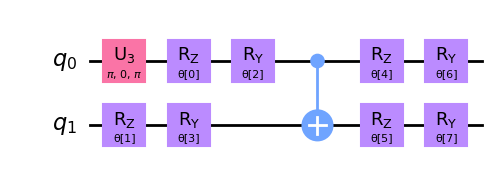

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
import numpy as np

theta_list = (2 * np.pi * np.random.rand(1, 8)).tolist()
observable = SparsePauliOp.from_list([("XX", 1), ("YY", -3)])

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = TwoLocal(
    2,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
ansatz = reference_circuit.compose(variational_form)

ansatz.decompose().draw('mpl')

In [5]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session

# Add your token below
service = QiskitRuntimeService(
    channel="ibm_quantum"
)

backend = service.backend("ibmq_qasm_simulator")
session = Session(backend=backend)

# Use estimator to get the expected values corresponding to each ansatz
estimator = Estimator(session=session)

AccountNotFoundError: 'Unable to find account.'